# Internet Firewall Data

https://archive.ics.uci.edu/dataset/542/internet+firewall+data

In [107]:
from src import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
data = readData('data/log2.csv')

Informacje ogólne o zbiorze danych:

Każdy wpis reprezentuje informacje o pewnej komunikacji użytkownika z serwerem oraz akcję jaką podjął firewall w ramach tej komunikacji.

Zbiór składa się z **12** cech:

|  | Source Port | Destination Port NAT | Source Port NAT | Destination Port | Action | Bytes | Bytes Sent | Bytes Received | Packets | Elapsed Time (sec) | pkts_sent | pkts_received |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Typ | int | int | int | int | string | int | int | int | int | int | int | int |
| Opis | Port źródłowy | Port docelowy | Port źródłowy NAT | Port docelowy NAT | Akcja, którą podjął firewall | Całkowita liczba bajtów | Liczba wysłanych bajtów | Liczba odebranych bajtów | Całkowita liczba pakietów | Czas trwania komunikacji | Liczba wysłanych pakietów | Liczba odebranych pakietów |
| Zakres | 0 - 65534 | 0 - 65535 | 0 - 65535 | 0 - 65535 | allow action drop reset-both | 60 - 1 mld | 60 - 1 mld | 60 - 1 mld | 1 - 1 mln | 0 - 10824 | 1 - 747.520 | 1 - 327.208 |

In [7]:
col = data['Action']
len(col[col == 'reset-both'])

54

In [4]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [5]:
data.shape

(65532, 12)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,65532.0,49391.969343,1.525571e+04,0.0,49183.0,53776.5,58638.00,6.553400e+04
Destination Port,65532.0,10577.385812,1.846603e+04,0.0,80.0,445.0,15000.00,6.553500e+04
NAT Source Port,65532.0,19282.972761,2.197069e+04,0.0,0.0,8820.5,38366.25,6.553500e+04
NAT Destination Port,65532.0,2671.049930,9.739162e+03,0.0,0.0,53.0,443.00,6.553500e+04
Bytes,65532.0,97123.950085,5.618439e+06,60.0,66.0,168.0,752.25,1.269359e+09
Bytes Sent,65532.0,22385.796908,3.828139e+06,60.0,66.0,90.0,210.00,9.484772e+08
Bytes Received,65532.0,74738.153177,2.463208e+06,0.0,0.0,79.0,449.00,3.208818e+08
Packets,65532.0,102.866035,5.133002e+03,1.0,1.0,2.0,6.00,1.036116e+06
Elapsed Time (sec),65532.0,65.833577,3.024618e+02,0.0,0.0,15.0,30.00,1.082400e+04
pkts_sent,65532.0,41.399530,3.218871e+03,1.0,1.0,1.0,3.00,7.475200e+05


In [7]:
data['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [9]:
#rowsNum = 11
#colsNum = 2
#
#fig, axes = plt.subplots(rowsNum, colsNum, figsize=(16, 66))
#
#index = 0
#
#for column_name in data.columns:
#    if data[column_name].dtype not in ['int64', 'float64']:
#        continue
#    row, col = index, 0
#    index += 1
#
#    axes[row, col].hist(data[column_name], bins=60)
#    axes[row, col].set_title('Histogram dla ' + column_name)
#    axes[row, col].set_xlabel('Wartość')
#    axes[row, col].set_ylabel('Ilość wystąpień')
#
#    axes[row, col + 1].hist(data[column_name], bins=60)
#    axes[row, col + 1].set_title('Histogram dla ' + column_name + '(Skala logarytmiczna)')
#    axes[row, col + 1].set_xlabel('Wartość')
#    axes[row, col + 1].set_ylabel('Log (Ilość wystąpień)')
#    axes[row, col + 1].set_yscale('log')
#
#plt.tight_layout()
#plt.show()

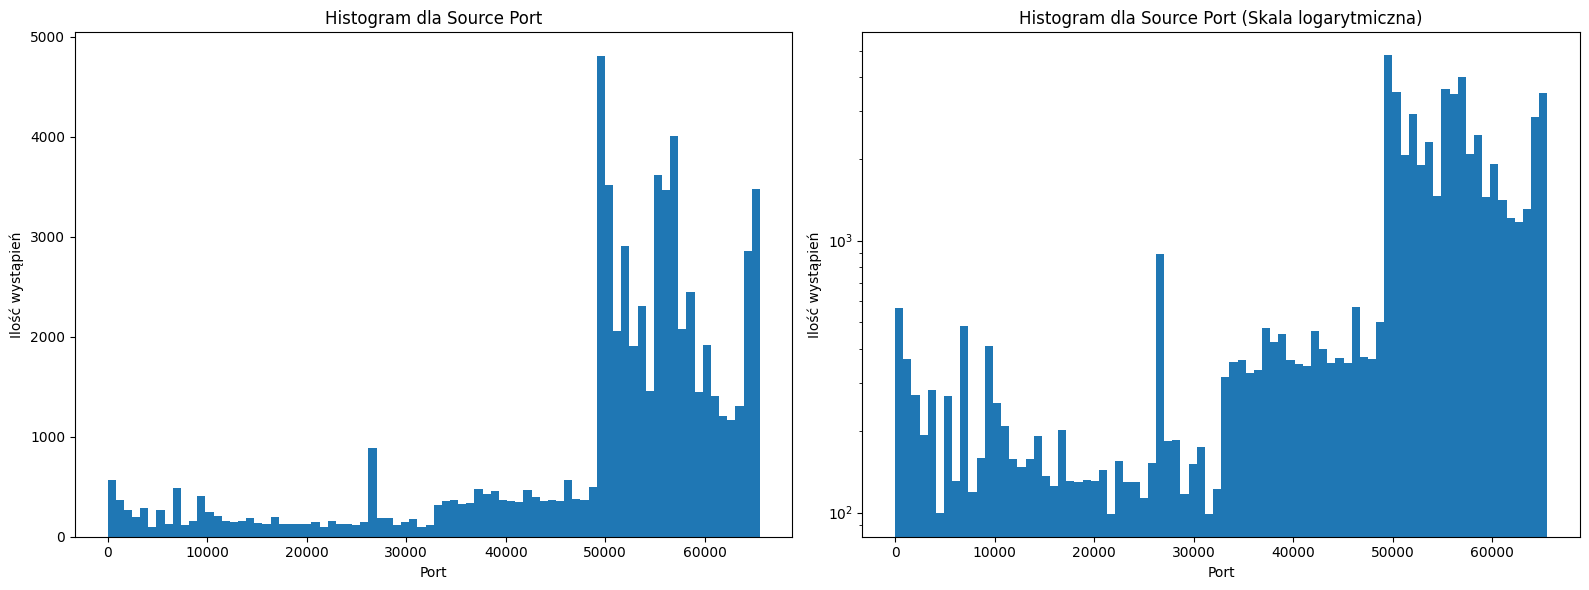

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(data['Source Port'], bins=80)
axes[0].set_title('Histogram dla Source Port')
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Ilość wystąpień')

axes[1].hist(data['Source Port'], bins=80)
axes[1].set_title('Histogram dla Source Port (Skala logarytmiczna)')
axes[1].set_xlabel('Port')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

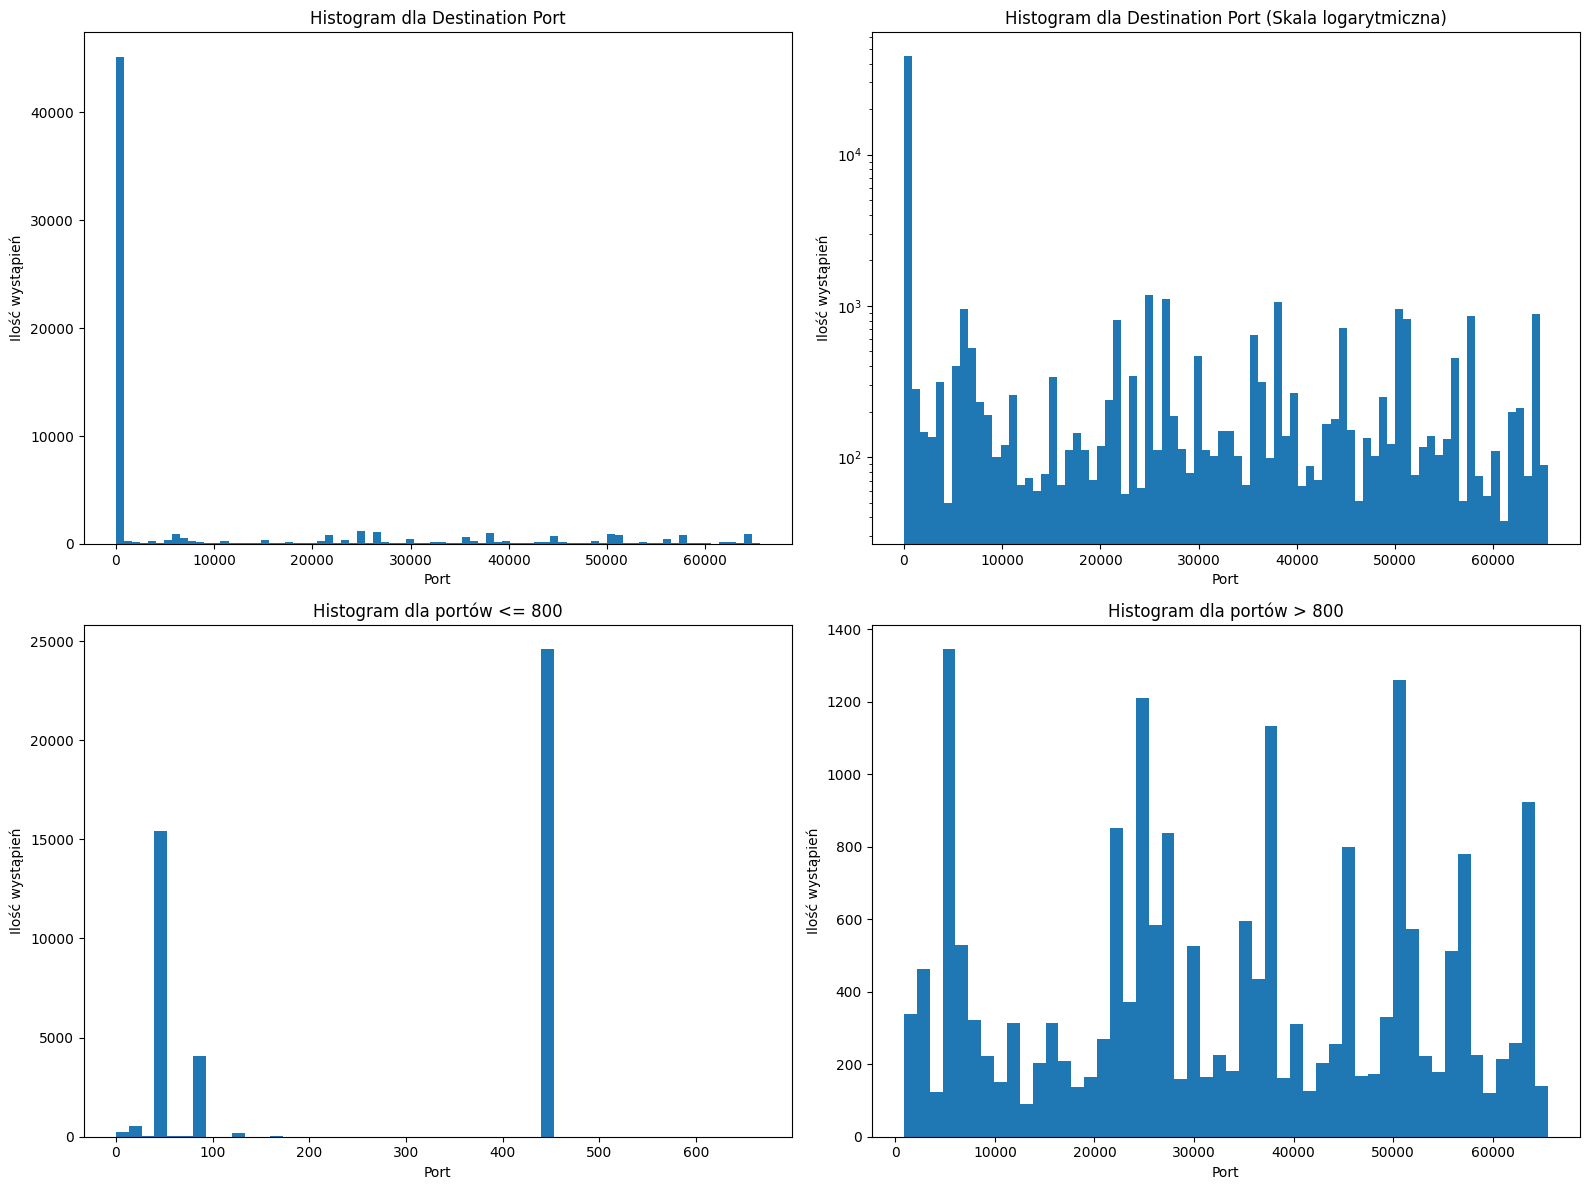

68.87% wszystkich wpisów posiada port mniejszy niz 800


In [11]:
col = data['Destination Port']
fix, axes = plt.subplots(2, 2, figsize=(16, 12))

splitPoint = 800

axes[0, 0].hist(col, bins=80)
axes[0, 0].set_title('Histogram dla Destination Port')
axes[0, 0].set_xlabel('Port')
axes[0, 0].set_ylabel('Ilość wystąpień')

axes[0, 1].hist(col, bins=80)
axes[0, 1].set_title('Histogram dla Destination Port (Skala logarytmiczna)')
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Ilość wystąpień')
axes[0, 1].set_yscale('log')

axes[1, 0].hist(col[col <= splitPoint], bins=50)
axes[1, 0].set_title('Histogram dla portów <= {}'.format(splitPoint))
axes[1, 0].set_xlabel('Port')
axes[1, 0].set_ylabel('Ilość wystąpień')


axes[1, 1].hist(col[col > splitPoint], bins=50)
axes[1, 1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1, 1].set_xlabel('Port')
axes[1, 1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port mniejszy niz {}'.format(len(col[col < splitPoint]) / len(col) * 100, splitPoint))

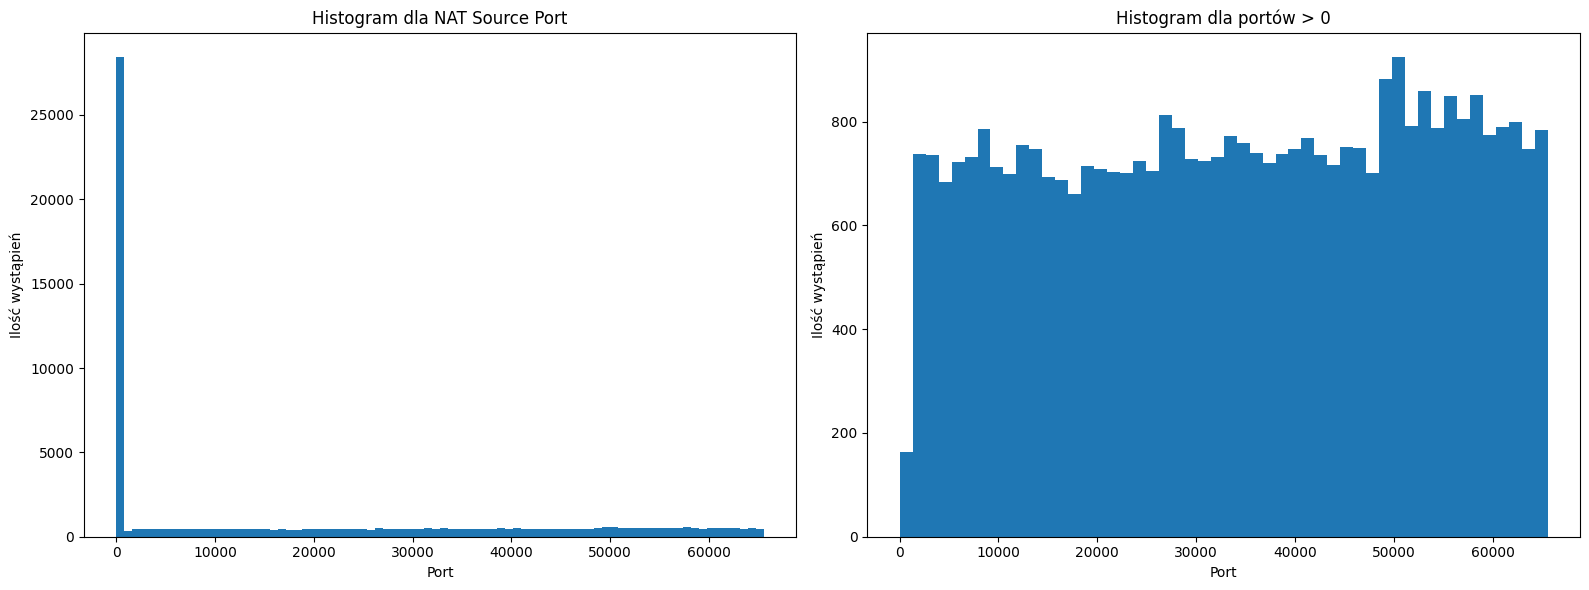

43.39% wszystkich wpisów posiada port źródłowy NAT równy 0


In [12]:
col_name = 'NAT Source Port'
col = data[col_name]
fix, axes = plt.subplots(1, 2, figsize=(16, 6))

splitPoint = 0

axes[0].hist(col, bins=80)
axes[0].set_title('Histogram dla {}'.format(col_name))
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Ilość wystąpień')

axes[1].hist(col[col > splitPoint], bins=50)
axes[1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1].set_xlabel('Port')
axes[1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port źródłowy NAT równy {}'.format(len(col[col == splitPoint]) / len(col) * 100, splitPoint))

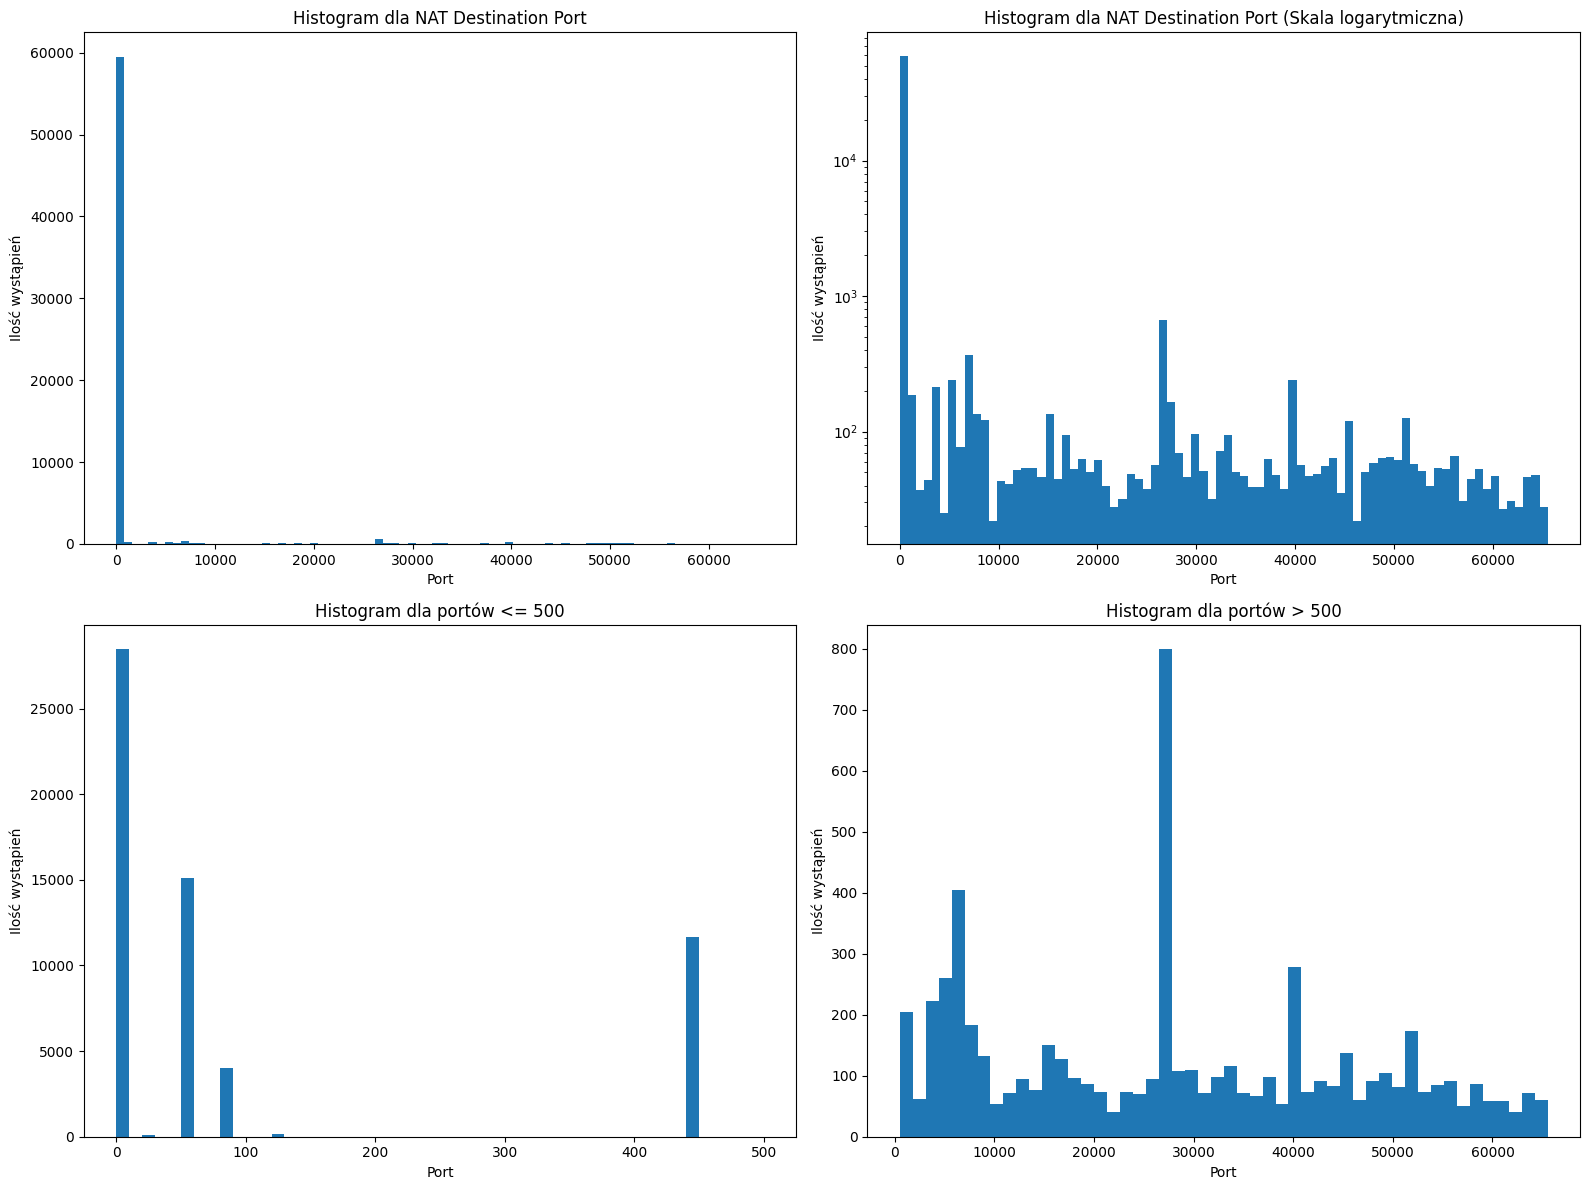

90.81% wszystkich wpisów posiada port mniejszy niz 500


In [13]:
col_name = 'NAT Destination Port'
col = data[col_name]
fix, axes = plt.subplots(2, 2, figsize=(16, 12))

splitPoint = 500

axes[0, 0].hist(col, bins=80)
axes[0, 0].set_title('Histogram dla {}'.format(col_name))
axes[0, 0].set_xlabel('Port')
axes[0, 0].set_ylabel('Ilość wystąpień')

axes[0, 1].hist(col, bins=80)
axes[0, 1].set_title('Histogram dla {} (Skala logarytmiczna)'.format(col_name))
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Ilość wystąpień')
axes[0, 1].set_yscale('log')

axes[1, 0].hist(col[col <= splitPoint], bins=50)
axes[1, 0].set_title('Histogram dla portów <= {}'.format(splitPoint))
axes[1, 0].set_xlabel('Port')
axes[1, 0].set_ylabel('Ilość wystąpień')


axes[1, 1].hist(col[col > splitPoint], bins=50)
axes[1, 1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1, 1].set_xlabel('Port')
axes[1, 1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port mniejszy niz {}'.format(len(col[col < splitPoint]) / len(col) * 100, splitPoint))

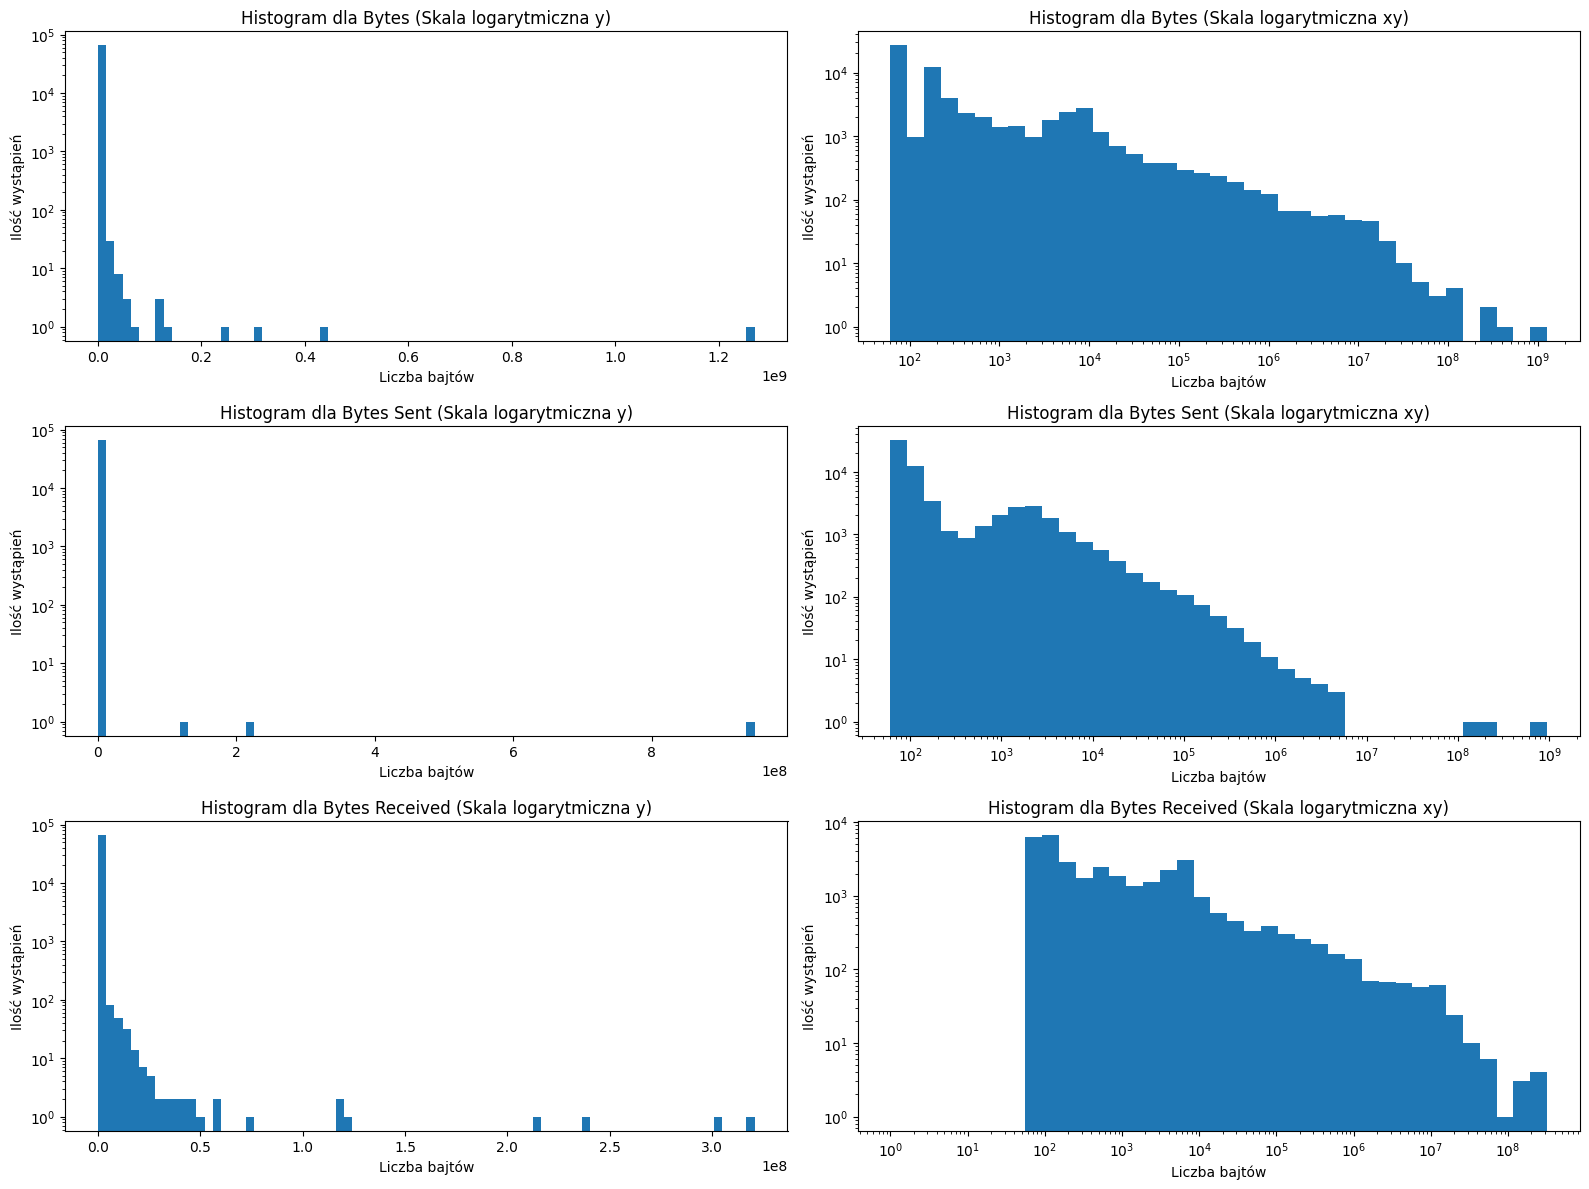

In [14]:
col_names = ['Bytes', 'Bytes Sent', 'Bytes Received']

fix, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, col_name in enumerate(col_names):
    col = data[col_name]
    ax = axes[i, 0]
    ax.hist(col, bins=80)
    ax.set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')

    ax = axes[i, 1]
    bins_log = np.geomspace(col.min() + 1, col.max(), 40)
    ax.hist(col, bins=bins_log)
    ax.set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')
    ax.set_xscale('log')

plt.tight_layout()
plt.show()

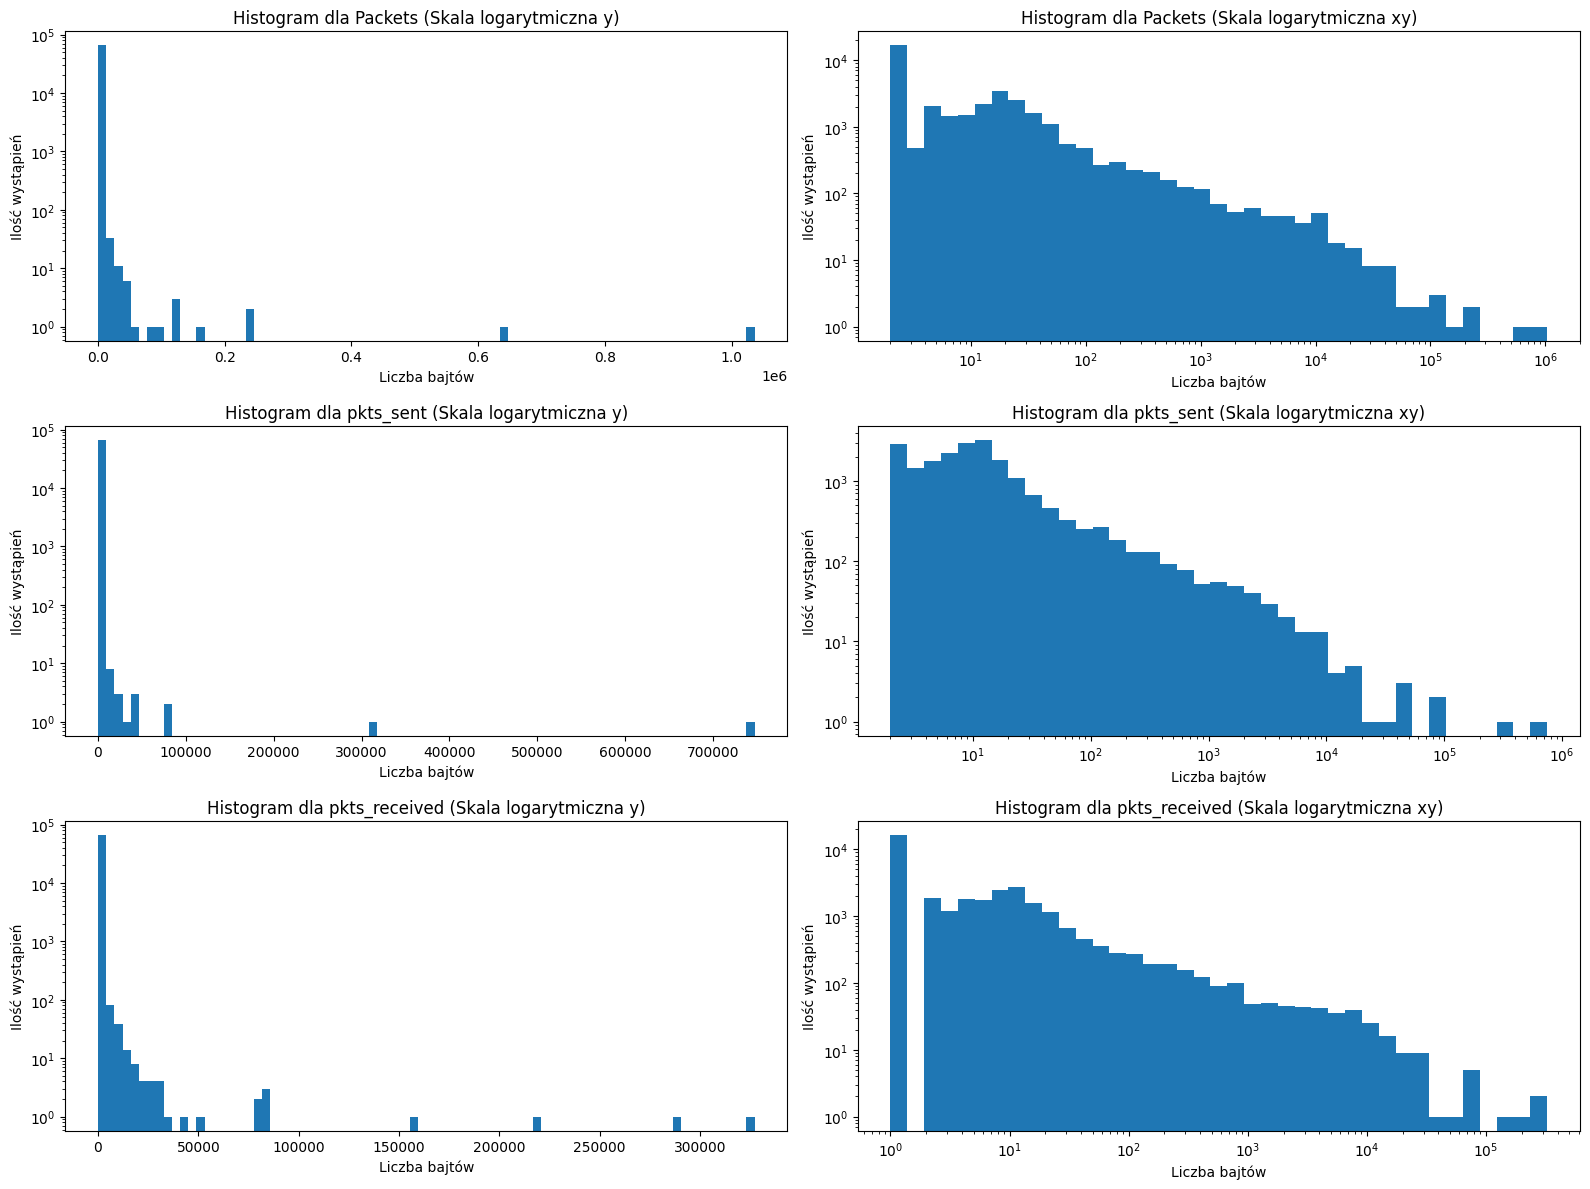

In [15]:
col_names = ['Packets', 'pkts_sent', 'pkts_received']

fix, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, col_name in enumerate(col_names):
    col = data[col_name]
    ax = axes[i, 0]
    ax.hist(col, bins=80)
    ax.set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')

    ax = axes[i, 1]
    bins_log = np.geomspace(col.min() + 1, col.max(), 40)
    ax.hist(col, bins=bins_log)
    ax.set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')
    ax.set_xscale('log')

plt.tight_layout()
plt.show()

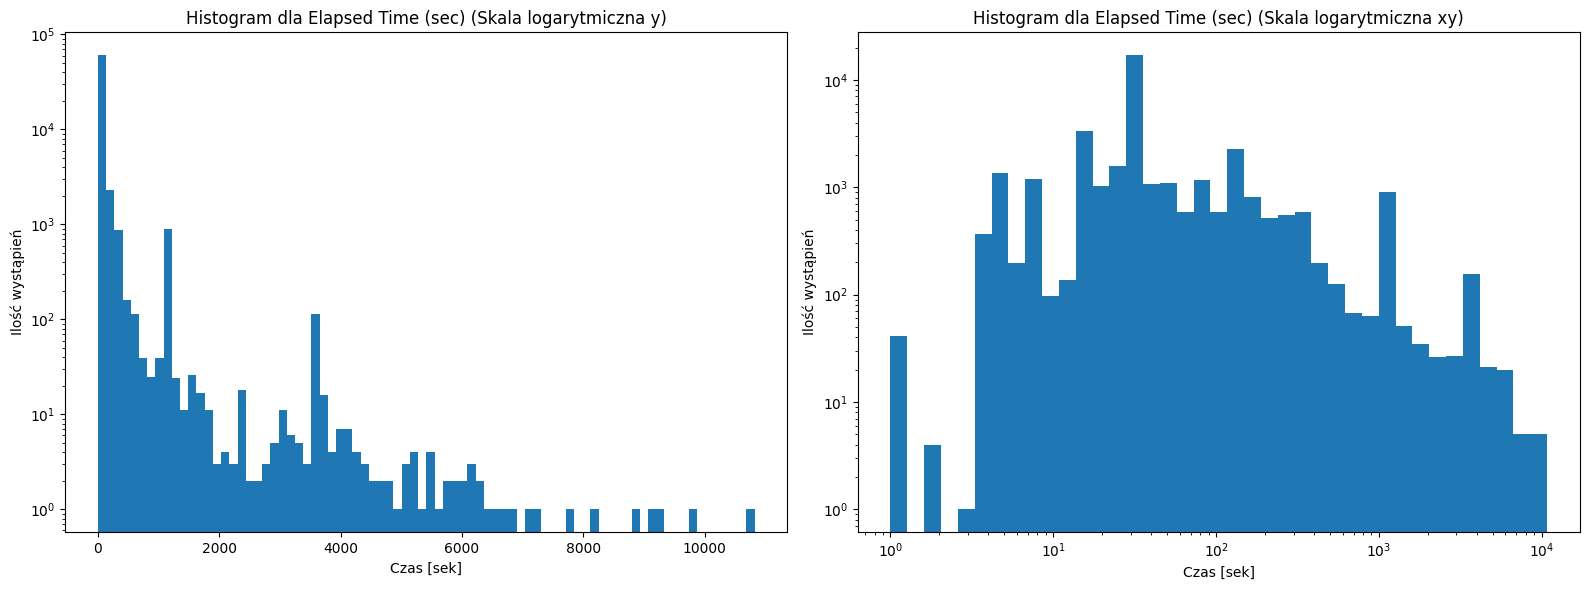

In [16]:
col_name = 'Elapsed Time (sec)'
col = data[col_name]
fix, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(col, bins=80)
axes[0].set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
axes[0].set_xlabel('Czas [sek]')
axes[0].set_ylabel('Ilość wystąpień')
axes[0].set_yscale('log')

bins_log = np.geomspace(col.min() + 1, col.max(), 40)
axes[1].hist(col, bins=bins_log)
axes[1].set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
axes[1].set_xlabel('Czas [sek]')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [23]:
tsne = TSNE()

In [28]:
x = data.drop('Action', axis=1)
y = data['Action']

In [31]:
tsne.fit(x, y)

TSNE()

['allow' 'drop' 'deny' 'reset-both']


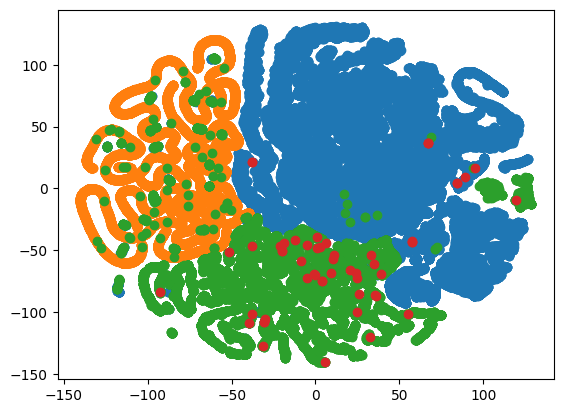

In [58]:
classes = y.unique()
print(classes)

for className in classes:
    embedding = tsne.embedding_[y == className]
    plt.scatter(embedding[:,0], embedding[:,1])

In [7]:
data_with_log = data.copy()
fields_to_modify = ['Bytes','Bytes Sent','Bytes Received','Packets','pkts_sent','pkts_received']
for i in fields_to_modify:
    data_with_log[i] = np.log10(data_with_log[i] + 1)

In [ ]:
tsne_with_log = TSNE()
x = data_with_log.drop('Action', axis=1)
y = data_with_log['Action']
tsne_with_log.fit(x, y)

In [45]:
color_map = {'allow': 'green', 'drop': 'orange', 'deny': 'red', 'reset-both': 'yellow'}

['allow' 'drop' 'deny' 'reset-both']


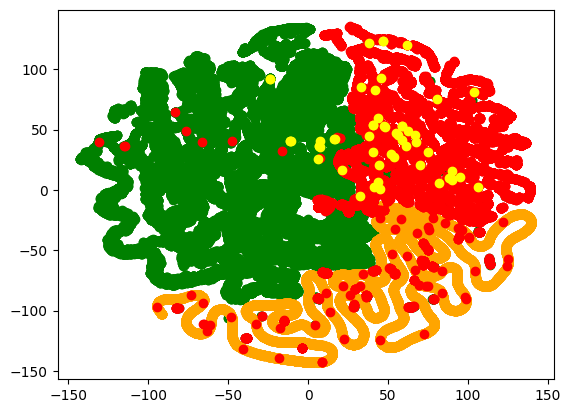

In [46]:
classes = y.unique()
print(classes)

for className in classes:
    embedding = tsne_with_log.embedding_[y == className]
    plt.scatter(embedding[:,0], embedding[:,1], c=color_map[className])

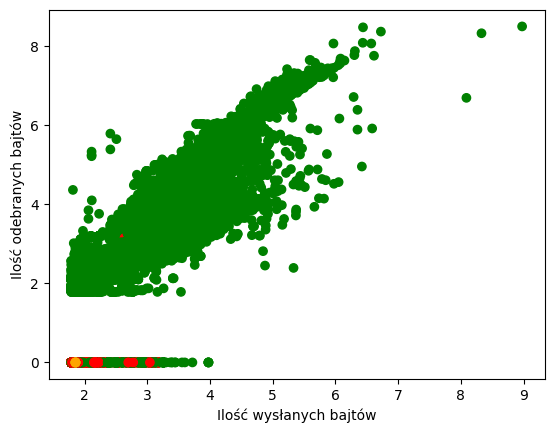

In [42]:
plt.scatter(np.log10(data['Bytes Sent'] + 1), np.log10(data['Bytes Received'] + 1), c=data['Action'].map(color_map))
plt.xlabel('Ilość wysłanych bajtów')
plt.ylabel('Ilość odebranych bajtów')
plt.show()

In [33]:
received = data['Bytes Received']
print('Liczba bajtów odebranych = 0: {}'.format(len(received[received == 0])))

Liczba bajtów odebranych = 0: 31574


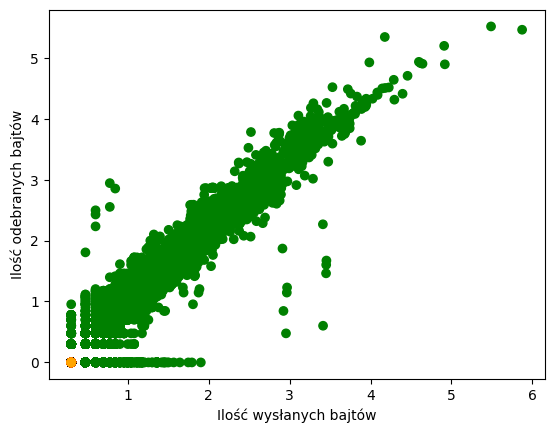

In [34]:
plt.scatter(data_with_log['pkts_sent'], data_with_log['pkts_received'], c=data['Action'].map(color_map))
plt.xlabel('Ilość wysłanych pakietów')
plt.ylabel('Ilość odebranych pakietów')
plt.show()

In [37]:
column = data['pkts_received']
print('Liczba pakietów odebranych = 0: {}'.format(len(column[column == 0])))
column = data['pkts_sent']
print('Liczba pakietów wysłanych = 0: {}'.format(len(column[column == 0])))

Liczba pakietów odebranych = 0: 31574
Liczba pakietów wysłanych = 0: 0


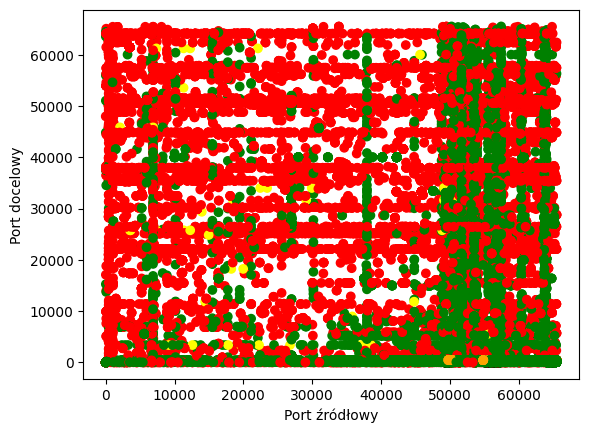

In [39]:
plt.scatter(data['Source Port'], data['Destination Port'], c=data['Action'].map(color_map))
plt.xlabel('Port źródłowy')
plt.ylabel('Port docelowy')
plt.show()

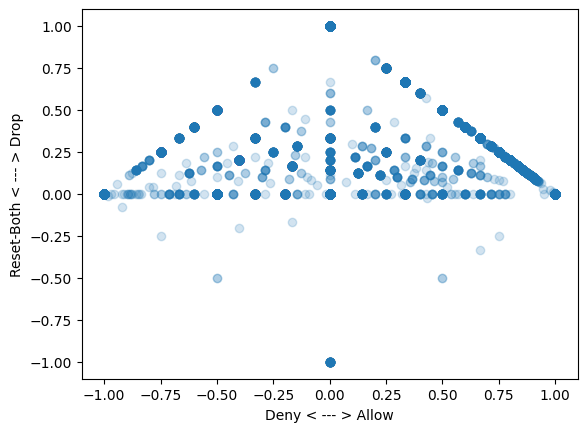

In [94]:
action_counts = data.groupby('Source Port')['Action'].value_counts(normalize=True).unstack(fill_value=0)
action_counts['x'] = action_counts['allow'] - action_counts['deny']
action_counts['y'] = action_counts['drop'] - action_counts['reset-both']
plt.scatter(action_counts['x'], action_counts['y'], alpha=0.2)
plt.xlabel('Deny < --- > Allow')
plt.ylabel('Reset-Both < --- > Drop')
plt.show()

In [95]:
reset_ports = action_counts[action_counts['reset-both'] == 1].index.tolist()
print(reset_ports)

[3529, 3608, 7372, 8116, 10967, 11317, 12283, 12285, 13968, 14459, 14967, 17800, 18017, 18252, 18517, 19626, 19983, 22130, 22285, 22461, 23461, 25234, 26793, 28135, 28305, 29136, 29951, 35828, 38126, 45690, 48903, 64014]


In [96]:
print('Całkowita ilość przypadków z reset-both: {}'.format(len(data[data['Action'] == 'reset-both'])))
print('Ilość przypadków wychwycona z listy portów: {}'.format(len(data[data['Source Port'].isin(reset_ports)])))

Całkowita ilość przypadków z reset-both: 54
Ilość przypadków wychwycona z listy portów: 34


In [110]:
saveListToFile(reset_ports, './data/reset_ports_list.txt')

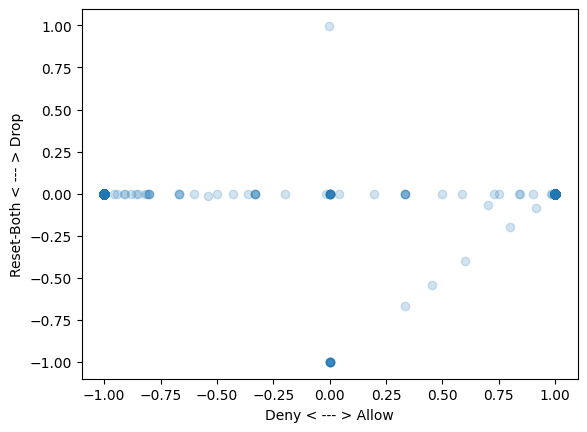

In [97]:
action_dest_counts = data.groupby('Destination Port')['Action'].value_counts(normalize=True).unstack(fill_value=0)
action_dest_counts['x'] = action_dest_counts['allow'] - action_dest_counts['deny']
action_dest_counts['y'] = action_dest_counts['drop'] - action_dest_counts['reset-both']
plt.scatter(action_dest_counts['x'], action_dest_counts['y'], alpha=0.2)
plt.xlabel('Deny < --- > Allow')
plt.ylabel('Reset-Both < --- > Drop')
plt.show()

In [100]:
deny_dest_ports = action_dest_counts[action_dest_counts['deny'] == 1].index.tolist()
allow_dest_ports = action_dest_counts[action_dest_counts['allow'] == 1].index.tolist()

In [103]:
all_selected_ports = set(data['Destination Port'])
unselected_ports = list(all_selected_ports - set(deny_dest_ports + allow_dest_ports))

In [105]:
print('Liczba wybranych portów docelowych z:\nAllow = {}\nDeny = {}\nPozostałe = {}'.format(len(allow_dest_ports),len(deny_dest_ports),len(all_selected_ports)))

Liczba wybranych portów docelowych z:
Allow = 2512
Deny = 691
Pozostałe = 3273


In [112]:
saveListToFile(deny_dest_ports, './data/deny_dest_ports_list.txt')
saveListToFile(allow_dest_ports, './data/allow_dest_ports_list.txt')

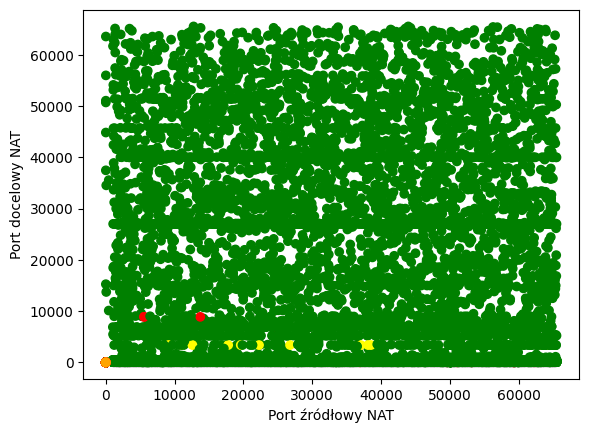

In [40]:
plt.scatter(data['NAT Source Port'], data['NAT Destination Port'], c=data['Action'].map(color_map))
plt.xlabel('Port źródłowy NAT')
plt.ylabel('Port docelowy NAT')
plt.show()

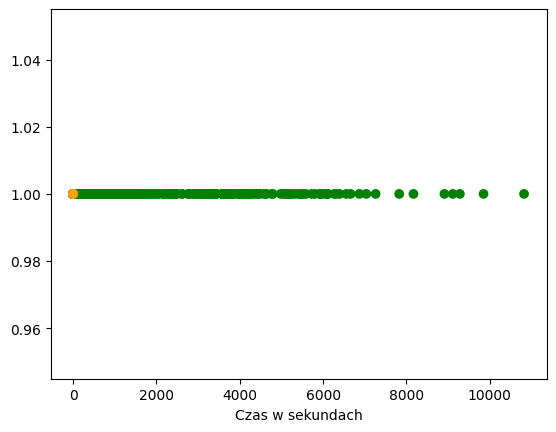

In [44]:
plt.scatter(data['Elapsed Time (sec)'], np.ones(data.shape[0]), c=data['Action'].map(color_map))
plt.xlabel('Czas w sekundach')
plt.ylabel('')
plt.show()